In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [41]:
df_bank = pd.read_csv('data/Churn.csv')
df_bank.sample(5)

RowNumber  CustomerId     Surname  CreditScore Geography  Gender  Age  \
9431       9432    15598948      DeRose          523     Spain  Female   24   
8651       8652    15760450  Rutherford          512    France    Male   43   
4691       4692    15758050     Madukwe          622     Spain    Male   37   
6814       6815    15665943         Mai          445    France    Male   25   
7122       7123    15815443          Lo          527     Spain  Female   46   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9431       5  172231.93              1          0               1   
8651       1       0.00              2          1               1   
4691       4       0.00              2          1               0   
6814       6       0.00              2          1               0   
7122      10  131414.76              1          1               0   

      EstimatedSalary  Exited  
9431        155144.12       0  
8651         52471.36       0  
4691          4459.50       0  
6814        119425.94       0  
7122         54947.51       0

In [42]:
df_bank.shape

(10000, 14)

# Analysis of Data

In [43]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [44]:
# df_bank['HasCrCard'] = df_bank['HasCrCard'].astype(np.object)
# df_bank['IsActiveMember'] = df_bank['IsActiveMember'].astype(np.object)

In [45]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [46]:
print(f'The number of numerical columns: {df_bank.select_dtypes(include=np.number).shape[1]}')
print(f'The number of Categorical columns: {df_bank.select_dtypes(exclude=np.number).shape[1]}')

The number of numerical columns: 11
The number of Categorical columns: 3


In [47]:
df_bank_num = df_bank.select_dtypes(include=np.number)
df_bank_cat = df_bank.select_dtypes(exclude=np.number)

### Numeric Data Analysis

In [48]:
df_bank_num.sample(2)

RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
6782       6783    15657809          585   55      10  106415.57   
5259       5260    15614635          582   52       2  151457.88   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
6782              3          1               1        122960.98       1  
5259              1          0               1         40893.61       0

In [49]:
df_bank_cat.sample(2)

Surname Geography  Gender
9447      Amadi    France  Female
66    Brownless   Germany  Female

In [50]:
df_bank_num.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [51]:
# Analyzing the non Id number columns
df_bank_num = df_bank_num[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']]
df_bank_num

CreditScore  Age  Tenure    Balance  NumOfProducts  EstimatedSalary  \
0             619   42       2       0.00              1        101348.88   
1             608   41       1   83807.86              1        112542.58   
2             502   42       8  159660.80              3        113931.57   
3             699   39       1       0.00              2         93826.63   
4             850   43       2  125510.82              1         79084.10   
...           ...  ...     ...        ...            ...              ...   
9995          771   39       5       0.00              2         96270.64   
9996          516   35      10   57369.61              1        101699.77   
9997          709   36       7       0.00              1         42085.58   
9998          772   42       3   75075.31              2         92888.52   
9999          792   28       4  130142.79              1         38190.78   

      Exited  
0          1  
1          0  
2          1  
3          0  
4          0  
...      ...  
9995       0  
9996       0  
9997       1  
9998       1  
9999       0  

[10000 rows x 7 columns]

In [52]:
df_bank_num.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

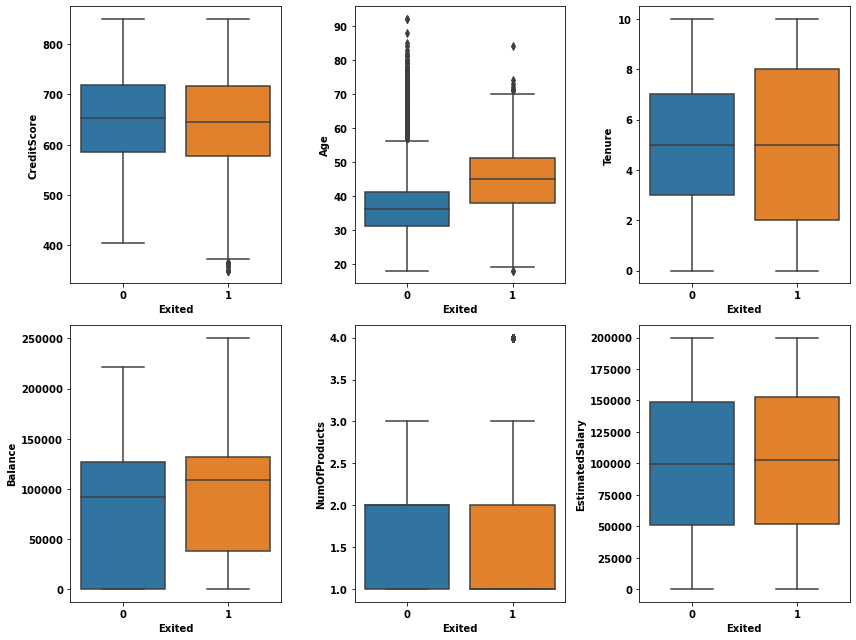

In [53]:
plt.figure(figsize=(12, 9))
plt_num = 1
for col in df_bank_num.columns[:-1]:
    plt.subplot(2, 3, plt_num)
    sns.boxplot(data=df_bank_num, y=df_bank_num[col], x=df_bank_num['Exited'])
    plt_num +=1
plt.tight_layout()
plt.show()

### Handling Outliers

In [54]:
from scipy import stats

In [55]:
z = np.abs(stats.zscore(df_bank[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]))
print(z)

[[0.32622142 0.29351742 1.04175968 1.22584767 0.91158349 0.02188649]
 [0.44003595 0.19816383 1.38753759 0.11735002 0.91158349 0.21653375]
 [1.53679418 0.29351742 1.03290776 1.33305335 2.52705662 0.2406869 ]
 ...
 [0.60498839 0.27860412 0.68712986 1.22584767 0.91158349 1.00864308]
 [1.25683526 0.29351742 0.69598177 0.02260751 0.80773656 0.12523071]
 [1.46377078 1.04143285 0.35020386 0.85996499 0.91158349 1.07636976]]


In [56]:
df_bank = df_bank[(z<3).all(axis=1)]
df_bank

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[9799 rows x 14 columns]

### Balancing of Data

<AxesSubplot:xlabel='Exited', ylabel='count'>

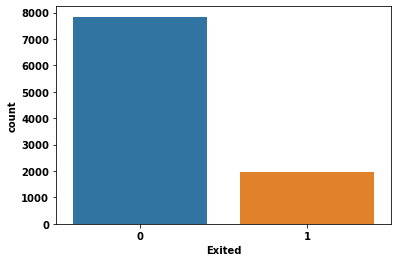

In [81]:
sns.countplot(data=df_bank, x='Exited')

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
oversampling = SMOTE()

### Descriptive Stats of Categorical Data

In [57]:
df_bank_cat.columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

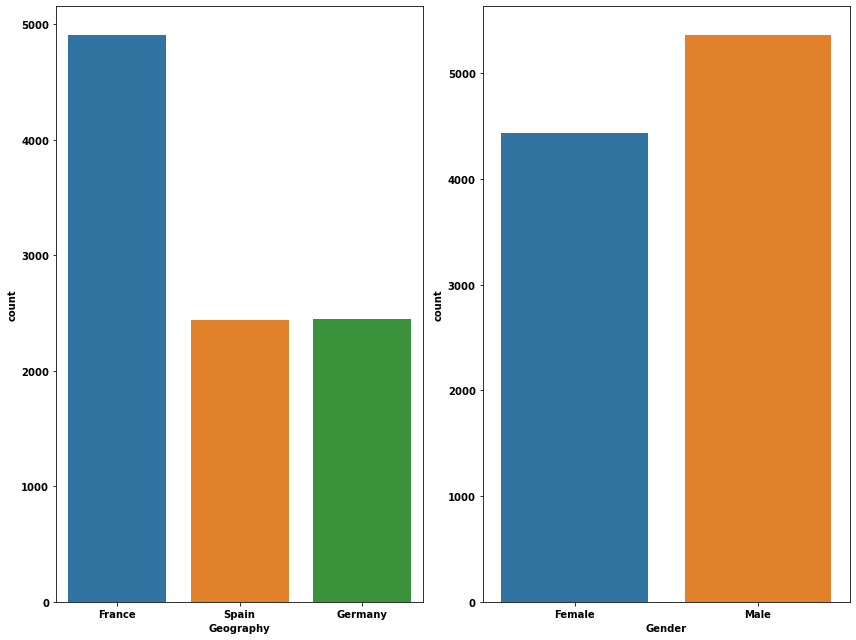

In [61]:
plt_num = 1
plt.figure(figsize=(12, 9))
for col in df_bank_cat[['Geography', 'Gender']].columns:
    plt.subplot(1, 2, plt_num)
    sns.countplot(data=df_bank, x=col)
    plt_num += 1

plt.tight_layout()
plt.show()

In [62]:
df_bank.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [63]:
# Drop the not useful columns
df_bank.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [64]:
df_bank.shape

(9799, 11)

In [65]:
df_bank = pd.get_dummies(df_bank, columns=['Geography', 'Gender'])

In [66]:
df_bank.sample(2)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
3951          807   47       9  167664.83              1          0   
4122          577   60      10  125389.70              2          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_France  \
3951               0        125440.11       1                 1   
4122               1        178616.73       0                 1   

      Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
3951                  0                0              1            0  
4122                  0                0              0            1

### Correlation of Data

No handles with labels found to put in legend.


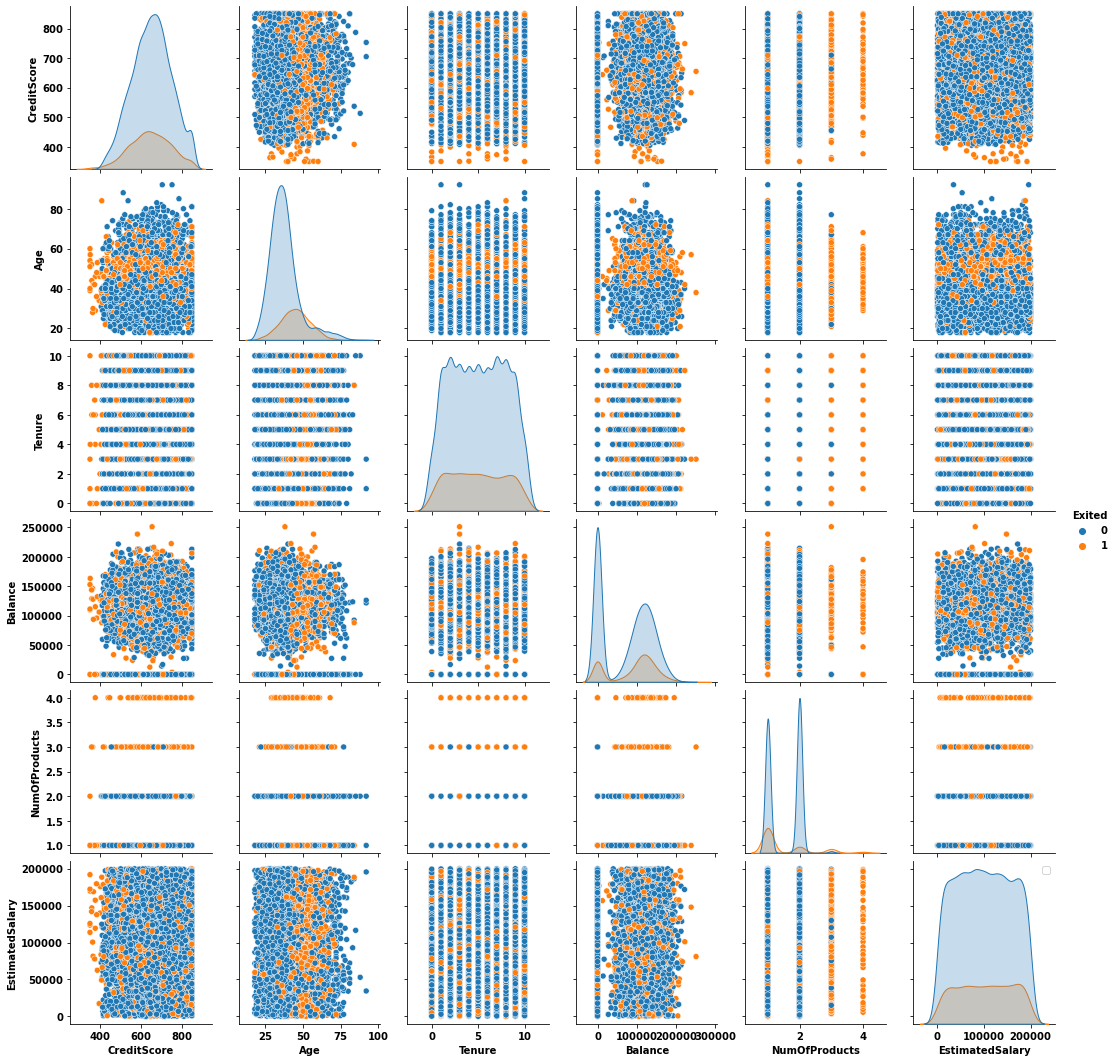

In [67]:
sns.pairplot(data=df_bank_num, hue='Exited')
plt.legend(loc='best')
plt.show()

In [68]:
# Correlation is effective only for continous numberic variables
corr_bank = df_bank[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].corr()
corr_bank

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.009138  0.000121  0.007141       0.011182   
Age                -0.009138  1.000000 -0.012346  0.037338      -0.054387   
Tenure              0.000121 -0.012346  1.000000 -0.012678       0.012609   
Balance             0.007141  0.037338 -0.012678  1.000000      -0.331017   
NumOfProducts       0.011182 -0.054387  0.012609 -0.331017       1.000000   
EstimatedSalary     0.001757 -0.009026  0.007962  0.013352       0.012667   

                 EstimatedSalary  
CreditScore             0.001757  
Age                    -0.009026  
Tenure                  0.007962  
Balance                 0.013352  
NumOfProducts           0.012667  
EstimatedSalary         1.000000

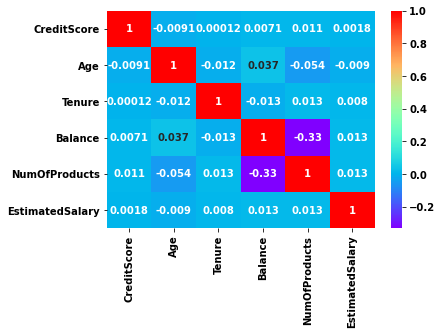

In [77]:
sns.heatmap(corr_bank, annot=True, cmap='rainbow')
plt.show()

<AxesSubplot:>

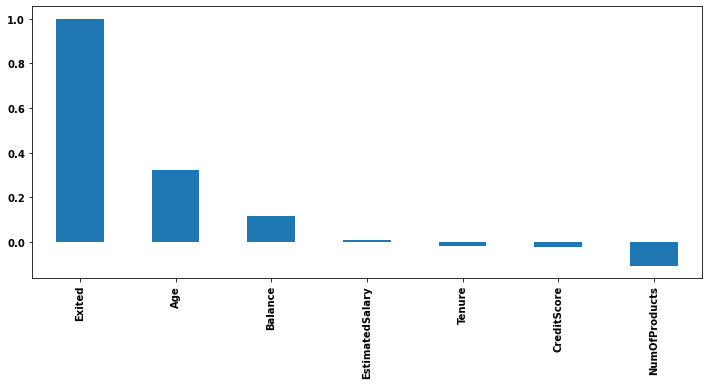

In [80]:
# Checking the correlation with the output variable
col_list =['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited'] 
df_bank[col_list].corr()['Exited'].sort_values(ascending=False).plot(kind='bar', figsize=(12,5))

In [70]:
print('''
Observation: Numeric columns are independent of each other
No significant correlation observed''')


Observation: Numeric columns are independent of each other
No significant correlation observed


In [71]:
X = df_bank.drop(columns=['Exited'], axis=1)
y = df_bank['Exited']
X.sample(2)

CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
7160          640   23       3  72012.76              1          1   
8145          850   37       9      0.00              1          0   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
7160               0        161333.13                 0                  1   
8145               0        100101.06                 1                  0   

      Geography_Spain  Gender_Female  Gender_Male  
7160                0              0            1  
8145                0              1            0

### Oversampling the data using SMOTE

In [84]:
X.shape

(9799, 13)

In [88]:
y.shape

(9799,)

<AxesSubplot:xlabel='Exited', ylabel='count'>

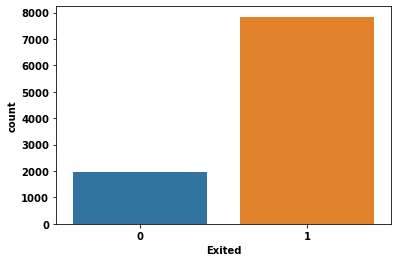

In [91]:
sns.countplot(data=y, x=y)

In [86]:
X_smote, y_smote = oversampling.fit_resample(X, y)

In [87]:
X_smote.shape

(15682, 13)

In [89]:
y_smote.shape

(15682,)

<AxesSubplot:xlabel='Exited', ylabel='count'>

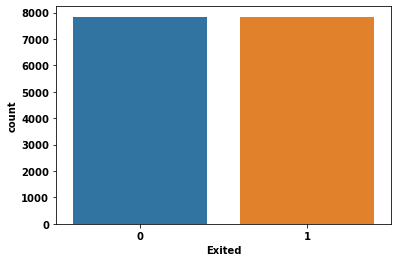

In [92]:
sns.countplot(data=y_smote, x=y_smote)

In [124]:
# Splitting the data using stratified sampling
# We will try to build the model with Original data
# We will impove the model by balancing the data using SMOTE techniques laters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y)

In [125]:
X_train.describe()

CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  6859.000000  6859.000000  6859.000000    6859.000000    6859.000000   
mean    650.451815    38.419886     5.010206   76868.335123       1.515381   
std      96.923426     9.604961     2.898931   62453.045085       0.550872   
min     363.000000    18.000000     0.000000       0.000000       1.000000   
25%     583.000000    32.000000     2.000000       0.000000       1.000000   
50%     652.000000    37.000000     5.000000   97588.600000       1.000000   
75%     718.000000    43.000000     8.000000  127864.330000       2.000000   
max     850.000000    70.000000    10.000000  250898.090000       3.000000   

         HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  \
count  6859.000000     6859.000000      6859.000000       6859.000000   
mean      0.702435        0.508383     99687.407282          0.496282   
std       0.457221        0.499966     57168.839778          0.500023   
min       0.000000        0.000000        11.580000          0.000000   
25%       0.000000        0.000000     51171.690000          0.000000   
50%       1.000000        1.000000     99800.870000          0.000000   
75%       1.000000        1.000000    147959.490000          1.000000   
max       1.000000        1.000000    199992.480000          1.000000   

       Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
count        6859.000000      6859.000000    6859.000000  6859.000000  
mean            0.252807         0.250911       0.460271     0.539729  
std             0.434653         0.433569       0.498455     0.498455  
min             0.000000         0.000000       0.000000     0.000000  
25%             0.000000         0.000000       0.000000     0.000000  
50%             0.000000         0.000000       0.000000     1.000000  
75%             1.000000         1.000000       1.000000     1.000000  
max             1.000000         1.000000       1.000000     1.000000

In [126]:
X_test.describe()

CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  2940.000000  2940.000000  2940.000000    2940.000000    2940.000000   
mean    650.901361    38.301701     5.014626   75549.607112       1.515646   
std      94.984824     9.799615     2.872614   62301.255836       0.550999   
min     365.000000    18.000000     0.000000       0.000000       1.000000   
25%     584.000000    32.000000     3.000000       0.000000       1.000000   
50%     652.000000    37.000000     5.000000   96437.080000       1.000000   
75%     717.000000    43.000000     7.000000  126843.492500       2.000000   
max     850.000000    70.000000    10.000000  213146.200000       3.000000   

         HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  \
count  2940.000000     2940.000000      2940.000000       2940.000000   
mean      0.712245        0.513946    100827.132531          0.512585   
std       0.452793        0.499891     58253.927585          0.499927   
min       0.000000        0.000000        90.070000          0.000000   
25%       0.000000        0.000000     50706.660000          0.000000   
50%       1.000000        1.000000    100384.690000          1.000000   
75%       1.000000        1.000000    151532.972500          1.000000   
max       1.000000        1.000000    199857.470000          1.000000   

       Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
count        2940.000000      2940.000000    2940.000000  2940.000000  
mean            0.243537         0.243878       0.434354     0.565646  
std             0.429290         0.429493       0.495756     0.495756  
min             0.000000         0.000000       0.000000     0.000000  
25%             0.000000         0.000000       0.000000     0.000000  
50%             0.000000         0.000000       0.000000     1.000000  
75%             0.000000         0.000000       1.000000     1.000000  
max             1.000000         1.000000       1.000000     1.000000

In [127]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2940 entries, 62 to 2374
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2940 non-null   int64  
 1   Age                2940 non-null   int64  
 2   Tenure             2940 non-null   int64  
 3   Balance            2940 non-null   float64
 4   NumOfProducts      2940 non-null   int64  
 5   HasCrCard          2940 non-null   int64  
 6   IsActiveMember     2940 non-null   int64  
 7   EstimatedSalary    2940 non-null   float64
 8   Geography_France   2940 non-null   uint8  
 9   Geography_Germany  2940 non-null   uint8  
 10  Geography_Spain    2940 non-null   uint8  
 11  Gender_Female      2940 non-null   uint8  
 12  Gender_Male        2940 non-null   uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 221.1 KB


# Base Model to explain the linear relationship between input and output

In [128]:
mod_lr = LogisticRegression()
mod_lr.fit(X_train, y_train)

LogisticRegression()

### Feature Importance

In [129]:
mod_lr.coef_

array([[-5.68543412e-03,  5.65215262e-02, -1.63372595e-03,
         2.89225930e-06, -1.18692993e-03, -2.44427937e-04,
        -1.62437919e-03, -1.77101373e-06, -9.89087785e-04,
         1.09477520e-03, -3.27415168e-04,  1.05781358e-03,
        -1.27954134e-03]])

In [130]:
np.exp(mod_lr.coef_)

array([[0.9943307 , 1.05814939, 0.99836761, 1.00000289, 0.99881377,
        0.9997556 , 0.99837694, 0.99999823, 0.9990114 , 1.00109537,
        0.99967264, 1.00105837, 0.99872128]])

In [131]:
list(X_train.columns)

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male']

In [132]:
df_bank_feature_imp = pd.DataFrame(
    {
    'Feature': X_train.columns,
    'Logit': mod_lr.coef_[0],
    'Odd_Ratio': np.exp(mod_lr.coef_[0])
    }
)
df_bank_feature_imp

Feature     Logit  Odd_Ratio
0         CreditScore -0.005685   0.994331
1                 Age  0.056522   1.058149
2              Tenure -0.001634   0.998368
3             Balance  0.000003   1.000003
4       NumOfProducts -0.001187   0.998814
5           HasCrCard -0.000244   0.999756
6      IsActiveMember -0.001624   0.998377
7     EstimatedSalary -0.000002   0.999998
8    Geography_France -0.000989   0.999011
9   Geography_Germany  0.001095   1.001095
10    Geography_Spain -0.000327   0.999673
11      Gender_Female  0.001058   1.001058
12        Gender_Male -0.001280   0.998721

<AxesSubplot:>

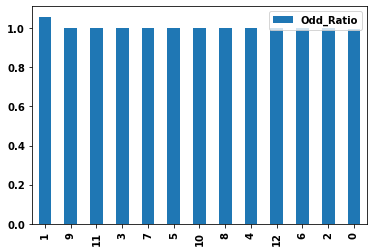

In [133]:
df_bank_feature_imp[['Odd_Ratio']].sort_values(by='Odd_Ratio', ascending=False,
                                              axis=0).plot(kind='bar')

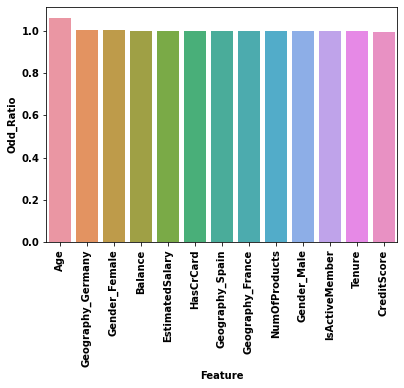

In [134]:
sns.barplot(data=df_bank_feature_imp.sort_values(by='Odd_Ratio', 
                                                 ascending=False), 
            x='Feature', y='Odd_Ratio' )
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [135]:
print('''
Observation: 
1. One unit increase in Age, will increase the Odds of getting exited by 1.05 times
2. One unit increase of CreditScore, will descrease the Odd of getting exited by 0.994 times''')


Observation: 
1. One unit increase in Age, will increase the Odds of getting exited by 1.05 times
2. One unit increase of CreditScore, will descrease the Odd of getting exited by 0.994 times


### Predictions

In [136]:
y_pred = mod_lr.predict(X_test)

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2353
           1       0.42      0.08      0.14       587

    accuracy                           0.79      2940
   macro avg       0.61      0.53      0.51      2940
weighted avg       0.73      0.79      0.73      2940



In [138]:
confusion_matrix(y_test, y_pred)

array([[2285,   68],
       [ 538,   49]], dtype=int64)

In [139]:
mod_lr.predict_proba(X_test)

array([[0.81007296, 0.18992704],
       [0.72459667, 0.27540333],
       [0.77126814, 0.22873186],
       ...,
       [0.87944059, 0.12055941],
       [0.435705  , 0.564295  ],
       [0.85722772, 0.14277228]])

In [140]:
mod_lr.predict_proba(X_test)[:, 1]

array([0.18992704, 0.27540333, 0.22873186, ..., 0.12055941, 0.564295  ,
       0.14277228])

In [141]:
proba_for_1_class = mod_lr.predict_proba(X_test)[:, 1]

In [146]:
# Changing the threshold value and checking if the accuracy/matrics changes
# Default threshold is 0.5
for threshold in [0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]:
    y_pred_dummy = np.zeros([len(y_test), 1])
    y_pred_dummy[proba_for_1_class>=threshold]=1
    print('The report for Threshold = ', threshold)
    print(confusion_matrix(y_test, y_pred_dummy))
    print(classification_report(y_test, y_pred_dummy))

The report for Threshold =  0.35
[[2109  244]
 [ 423  164]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2353
           1       0.40      0.28      0.33       587

    accuracy                           0.77      2940
   macro avg       0.62      0.59      0.60      2940
weighted avg       0.75      0.77      0.76      2940

The report for Threshold =  0.4
[[2199  154]
 [ 471  116]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.88      2353
           1       0.43      0.20      0.27       587

    accuracy                           0.79      2940
   macro avg       0.63      0.57      0.57      2940
weighted avg       0.74      0.79      0.75      2940

The report for Threshold =  0.45
[[2256   97]
 [ 508   79]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      2353
           1       0.45      0.13      0.21       587

   

### Finding the Best Classifier Model with the complete data

In [147]:
from xgboost import XGBClassifier

In [148]:
mod_lr = LogisticRegression()
mod_dtc = DecisionTreeClassifier()
mod_rfc = RandomForestClassifier()
mod_knn = KNeighborsClassifier()
mod_gnb = GaussianNB()
mod_xgb = XGBClassifier()

In [149]:
kf = KFold(n_splits=5, shuffle=True)

In [151]:
import warnings
warnings.filterwarnings('ignore')

In [155]:
df_mod_scores = pd.DataFrame()
for est, mod_name in zip([mod_lr, mod_dtc, mod_rfc, mod_knn, mod_gnb, mod_xgb], 
                ['lr', 'dtc', 'rfc', 'knn', 'gnb', 'xgb']):
    score = cross_val_score(estimator=est, X=X, y=y, cv=kf, scoring='f1_weighted')
    print(f'Model Name: {mod_name}, \
          Mean:{np.mean(score)}, Variance:{np.std(score)/np.mean(score)}')
    df_mod_scores = df_mod_scores.append({
        'Model Name': mod_name,
        'Mean':np.mean(score), 
        'Variance':np.std(score)/np.mean(score)
    }, ignore_index=True)
    
df_mod_scores

Model Name: lr,           Mean:0.7363076048221084, Variance:0.009998207026892192
Model Name: dtc,           Mean:0.7932692371554506, Variance:0.005810843677721317
Model Name: rfc,           Mean:0.8458725907166933, Variance:0.007544461995041856
Model Name: knn,           Mean:0.7182539344899631, Variance:0.010966579018363669
Model Name: gnb,           Mean:0.7514331533527947, Variance:0.016119599629782363
[19:21:14] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:14] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:21:14] WA

Mean Model Name  Variance
0  0.736308         lr  0.009998
1  0.793269        dtc  0.005811
2  0.845873        rfc  0.007544
3  0.718254        knn  0.010967
4  0.751433        gnb  0.016120
5  0.840759        xgb  0.010129

In [156]:
df_mod_scores[['Model Name','Mean','Variance']].sort_values(by=['Mean'], ascending=False)

Model Name      Mean  Variance
2        rfc  0.845873  0.007544
5        xgb  0.840759  0.010129
1        dtc  0.793269  0.005811
4        gnb  0.751433  0.016120
0         lr  0.736308  0.009998
3        knn  0.718254  0.010967

In [157]:
print('''
Observation: Random forest performed well both in terms of Mean and Variance''')


Observation: Random forest performed well both in terms of Mean and Variance


### Balancing Techniques SMOTE and NearMiss

In [158]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [159]:
y.value_counts()

0    7841
1    1958
Name: Exited, dtype: int64

In [160]:
count_class_0 = 5000
count_class_1 = 5000

pipe = make_pipeline(
    SMOTE(sampling_strategy={1: count_class_1}),
    NearMiss(sampling_strategy={0: count_class_0})
)

X_bal, y_bal = pipe.fit_resample(X, y)

In [161]:
for est, mod_name in zip([mod_lr, mod_dtc, mod_rfc, mod_knn, mod_gnb, mod_xgb], 
                ['s_lr', 's_dtc', 's_rfc', 's_knn', 's_gnb', 's_xgb']):
    score = cross_val_score(estimator=est, X=X_bal, y=y_bal, 
                            cv=kf, scoring='f1_weighted')
    print(f'Model Name: {mod_name}, \
          Mean:{np.mean(score)}, Variance:{np.std(score)/np.mean(score)}')
    df_mod_scores = df_mod_scores.append({
        'Model Name': mod_name,
        'Mean':np.mean(score), 
        'Variance':np.std(score)/np.mean(score)
    }, ignore_index=True)
    
df_mod_scores

Model Name: s_lr,           Mean:0.7056064979197426, Variance:0.020544761377523778
Model Name: s_dtc,           Mean:0.826196378919329, Variance:0.008186576864371475
Model Name: s_rfc,           Mean:0.8762685238425598, Variance:0.00425864435600066
Model Name: s_knn,           Mean:0.6389875139331778, Variance:0.00924942625814706
Model Name: s_gnb,           Mean:0.7320530659672035, Variance:0.01501109661429949
[19:40:46] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:40:46] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:40:

Mean Model Name  Variance
0   0.736308         lr  0.009998
1   0.793269        dtc  0.005811
2   0.845873        rfc  0.007544
3   0.718254        knn  0.010967
4   0.751433        gnb  0.016120
5   0.840759        xgb  0.010129
6   0.705606       s_lr  0.020545
7   0.826196      s_dtc  0.008187
8   0.876269      s_rfc  0.004259
9   0.638988      s_knn  0.009249
10  0.732053      s_gnb  0.015011
11  0.872076      s_xgb  0.008869

In [162]:
df_mod_scores[['Model Name','Mean','Variance']].sort_values(by='Mean', ascending=False)

Model Name      Mean  Variance
8       s_rfc  0.876269  0.004259
11      s_xgb  0.872076  0.008869
2         rfc  0.845873  0.007544
5         xgb  0.840759  0.010129
7       s_dtc  0.826196  0.008187
1         dtc  0.793269  0.005811
4         gnb  0.751433  0.016120
0          lr  0.736308  0.009998
10      s_gnb  0.732053  0.015011
3         knn  0.718254  0.010967
6        s_lr  0.705606  0.020545
9       s_knn  0.638988  0.009249

In [163]:
print('''
Observation: After the imbalance of data is corrected by both Over Sampling and Under Sampling the Random Forest model gives better results''')


Observation: After the imbalance of data is corrected by both Over Sampling and Under Sampling the Random Forest model gives better results


### Creating the best model by Hyper parameter tunning

In [164]:
params = {
    'n_estimators': [50, 75, 100, 125, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25]
}


In [165]:
mod_rfc = RandomForestClassifier()
mod_gscv = GridSearchCV(estimator=mod_rfc, 
                        param_grid=params, 
                        scoring='f1_weighted'
                       )

In [166]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, 
                                                    test_size=0.3, 
                                                    stratify=y_bal)

In [167]:
mod_gscv.fit(X_train_bal, y_train_bal)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [50, 75, 100, 125, 150]},
             scoring='f1_weighted')

In [174]:
mod_rfc_best = RandomForestClassifier(**mod_gscv.best_params_)

In [175]:
mod_rfc_best.fit(X_train_bal, y_train_bal)

RandomForestClassifier(criterion='entropy', max_depth=25)

In [177]:
y_pred_bal = mod_rfc_best.predict(X_test_bal)

In [178]:
from sklearn.metrics import ConfusionMatrixDisplay

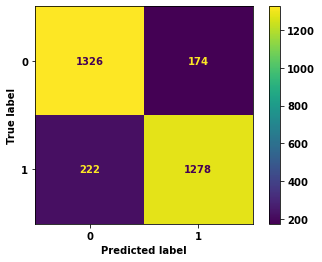

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1500
           1       0.88      0.85      0.87      1500

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000



In [180]:
ConfusionMatrixDisplay(confusion_matrix(y_test_bal, y_pred_bal),
                      display_labels=mod_rfc_best.classes_).plot()
plt.show()

print(classification_report(y_test_bal, y_pred_bal))

In [181]:
from sklearn.metrics import cohen_kappa_score

In [182]:
cohen_kappa_score(y_test_bal, y_pred_bal)

0.736

In [183]:
cohen_kappa_score(y_test, y_pred)

0.0780179279466694

In [184]:
from sklearn.metrics import roc_curve, roc_auc_score

Text(0.1, 0.9, "('ROC AUC Score:', 0.868)")

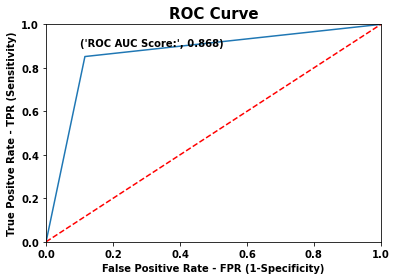

In [193]:
fpr, tpr, thresholds = roc_curve(y_test_bal, y_pred_bal)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1], 'r--')

plt.title('ROC Curve', fontsize=15)
plt.xlabel('False Positive Rate - FPR (1-Specificity)')
plt.ylabel('True Positve Rate - TPR (Sensitivity)')
plt.text(x=0.1, y=0.9, s=('ROC AUC Score:', round(roc_auc_score(y_test_bal, y_pred_bal), 4)))

### ROC Curve for Class 1

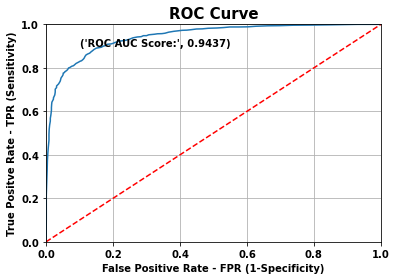

In [194]:
y_pred_bal_cls1_prob = mod_rfc_best.predict_proba(X_test_bal)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_bal, y_pred_bal_cls1_prob)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0,1], [0,1], 'r--')


plt.title('ROC Curve', fontsize=15)
plt.xlabel('False Positive Rate - FPR (1-Specificity)')
plt.ylabel('True Positve Rate - TPR (Sensitivity)')
plt.text(x=0.1, y=0.9, s=('ROC AUC Score:', round(roc_auc_score(y_test_bal, y_pred_bal_cls1_prob),4)))
plt.grid(True)
plt.show()

### Decision Tree - Ploting

In [195]:
mod_dtc = DecisionTreeClassifier()
mod_dtc.fit(X_train_bal, y_train_bal)
y_pred_bal_dt = mod_dtc.predict(X_test_bal)

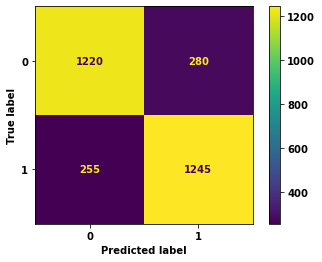

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1500
           1       0.82      0.83      0.82      1500

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



In [196]:
ConfusionMatrixDisplay(confusion_matrix(y_test_bal, y_pred_bal_dt),
                      display_labels=mod_dtc.classes_).plot()
plt.show()

print(classification_report(y_test_bal, y_pred_bal_dt))

In [200]:
from sklearn import tree
import pydotplus
from IPython.display import Image

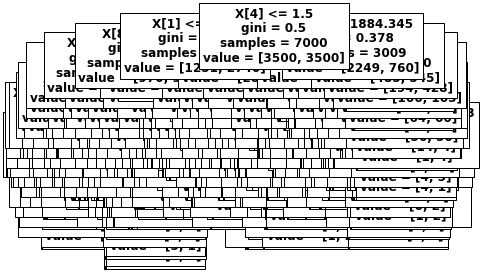

In [198]:

tree.plot_tree(mod_dtc, fontsize=12)
plt.show()

In [202]:
dot_data = tree.export_graphviz(mod_dtc, feature_names=X_train_bal.columns,
                    class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.590386 to fit

